In [6]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import lmfit

In [7]:
with open('Data/data.txt','r') as tf:
    data = np.genfromtxt(tf).T

In [8]:
print('durchschnittlicher fehler in %')
yerr = np.mean(data[2]/data[1])
print(yerr *100)

durchschnittlicher fehler in %
3.5339825186025027


[[Model]]
    Model(fitfunc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 22
    # variables        = 2
    chi-square         = 12.5645057
    reduced chi-square = 0.62822529
    Akaike info crit   = -8.32366563
    Bayesian info crit = -6.14158072
    R-squared          = 0.99998688
[[Variables]]
    a:  8.89141397 +/- 0.03793167 (0.43%) (init = 6.2)
    b: -0.98492761 +/- 0.01153110 (1.17%) (init = -0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.988


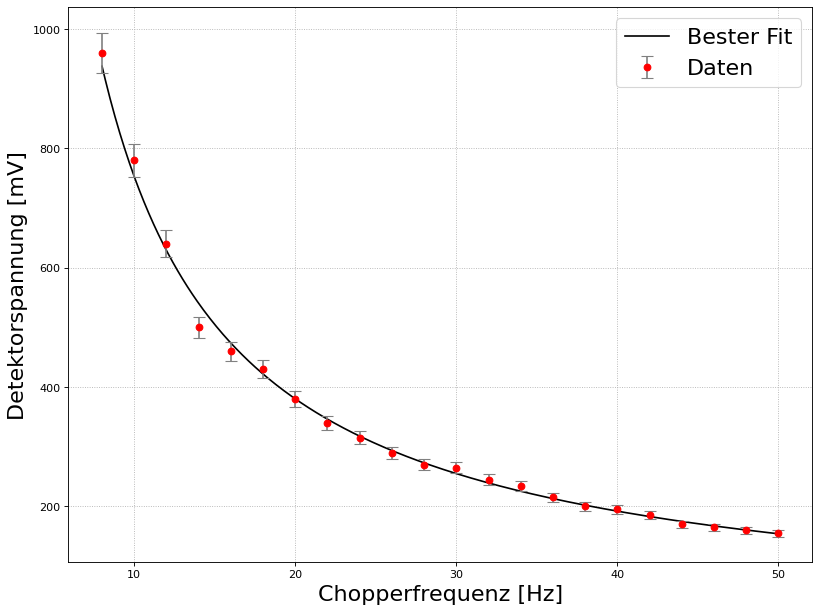

In [9]:
def fitfunc(x,a,b):
    return np.exp(a+b*np.log(x))





model_func = lmfit.model.Model(fitfunc)  

#parameter erstellen
pars_func = model_func.make_params()


pars_func["a"].set(value=6.2)
pars_func["b"].set(value=-0.2)
 
#Fitten
res = model_func.fit(data[1],x=data[0],params=pars_func,weights=1/(data[1]*yerr),nan_policy='propagate')
print(res.fit_report())


f.figsize(1)
plt.plot(np.arange(8,50,0.1),res.eval(x=np.arange(8,50,0.1)),color='k',label='Bester Fit')
plt.errorbar(data[0],data[1],yerr = data[1]*yerr,fmt='or',label = 'Daten',ecolor='gray',capsize = 5)
f.form(ylabel='Detektorspannung [mV]',xlabel='Chopperfrequenz [Hz]',name='Res/A2.pdf')


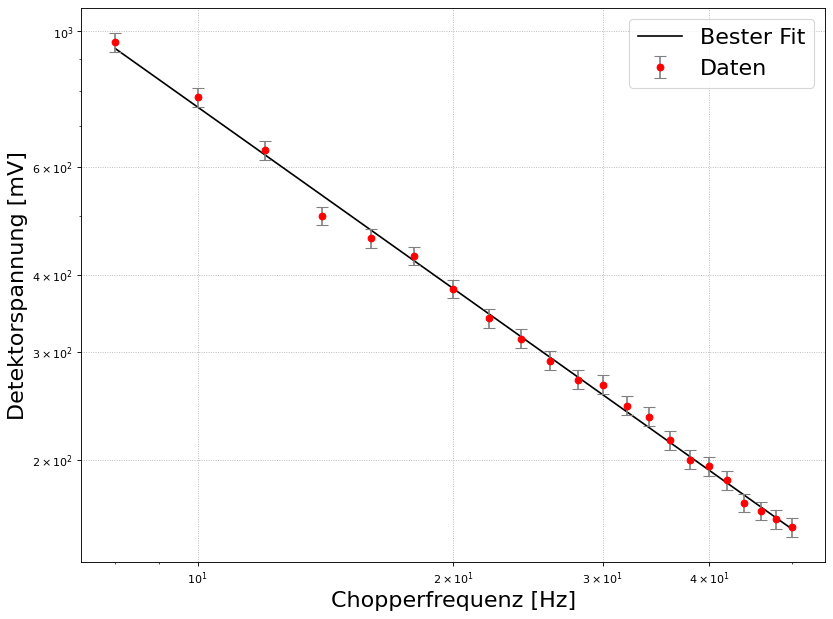

In [10]:
f.figsize(1)
plt.plot(np.arange(8,50,0.1),res.eval(x=np.arange(8,50,0.1)),color='k',label='Bester Fit')
plt.errorbar(data[0],data[1],yerr = data[1]*yerr,fmt='or',label = 'Daten',ecolor='gray',capsize = 5)

plt.xscale('log')
plt.yscale('log')

plt.xticks([10,20,30,40])
plt.yticks([200,300,400,600,1000])

f.form(ylabel='Detektorspannung [mV]',xlabel='Chopperfrequenz [Hz]',name='Res/A2_doppellog.pdf')